In [1]:
## SVM - sensitive to the scale of Variables
## Hard Margin vs Soft Margin

In [14]:
##MODULE LOAD
import numpy as np
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #length, width
y = (iris['target'] == 2).astype(np.float64)

In [15]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C = 1, loss = 'hinge'))
svm_clf.fit(X, y)
svm_clf.predict([[5.5,1.7]])

array([1.])

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
poly_svm_clf = make_pipeline(PolynomialFeatures(degree = 3),StandardScaler(), LinearSVC(C=10, loss='hinge'))
poly_svm_clf.fit(X, y)

/Users/dangchan/miniforge3/envs/atf/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, loss='hinge'))])

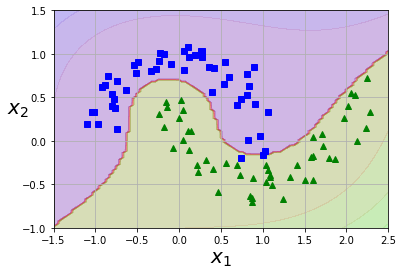

In [17]:
##Plotting
import matplotlib.pyplot as plt
import os 

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

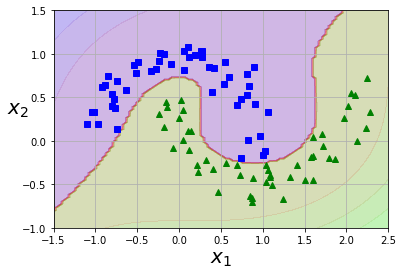

In [24]:
## Polynominal Kernel
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel = 'poly', degree = 10, coef0=100, C=5))
poly_kernel_svm_clf.fit(X,y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

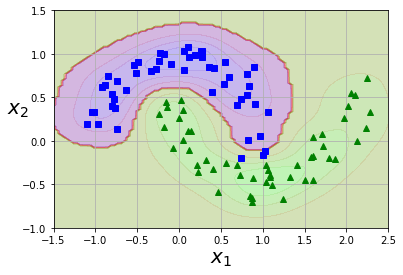

In [27]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(), SVC(kernel='rbf',gamma=5, C=0.001)
)
rbf_kernel_svm_clf.fit(X, y)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()